In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy

In [ ]:
data = mnist.load_data()

In [ ]:
(x_train, y_train), (x_test, y_test) = data

/tmp/ipython-input-4280676001.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(x_train[786])


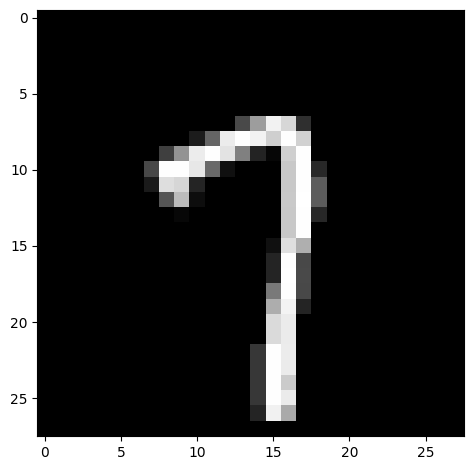

In [ ]:
from skimage import io
io.imshow(x_train[786])
plt.show()


In [ ]:
print(f"(rows, columns) in xtrain = {x_train.shape}")
print(f"(rows, columns) in xtest = {x_test.shape}")
print(f"values in ytrain = {y_train.shape}")
print(f"values in ytest = {y_test.shape}")

(rows, columns) in xtrain = (60000, 28, 28)
(rows, columns) in xtest = (10000, 28, 28)
values in ytrain = (60000,)
values in ytest = (10000,)


model construction

In [ ]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28, 1)))
model.add(Dense(units = 2048, activation = 'relu'))
model.add(Dense(units=1024, activation = 'relu'))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=100, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='Adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 59s 123ms/step - accuracy: 0.8014 - loss: 12.4754 - val_accuracy: 0.9538 - val_loss: 0.1479
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 120ms/step - accuracy: 0.9722 - loss: 0.0886 - val_accuracy: 0.9614 - val_loss: 0.1394
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 58s 124ms/step - accuracy: 0.9786 - loss: 0.0671 - val_accuracy: 0.9622 - val_loss: 0.1290
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 118ms/step - accuracy: 0.9811 - loss: 0.0609 - val_accuracy: 0.9723 - val_loss: 0.1109
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 119ms/step - accuracy: 0.9845 - loss: 0.0533 - val_accuracy: 0.9705 - val_loss: 0.1153


In [ ]:
history.history

{'accuracy': [0.9099000096321106,
  0.9715333580970764,
  0.9775000214576721,
  0.9805833101272583,
  0.9825166463851929],
 'loss': [2.8387234210968018,
  0.09264723211526871,
  0.07318845391273499,
  0.06415940076112747,
  0.059297315776348114],
 'val_accuracy': [0.9538000226020813,
  0.9613999724388123,
  0.9621999859809875,
  0.9722999930381775,
  0.9704999923706055],
 'val_loss': [0.14792299270629883,
  0.1393895298242569,
  0.12896336615085602,
  0.11092479526996613,
  0.11534376442432404]}

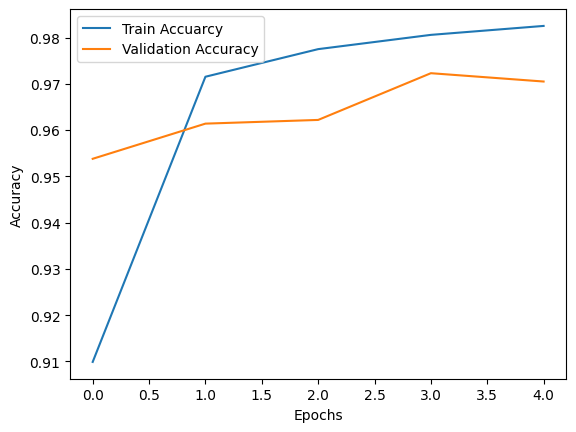

In [ ]:
plt.plot(history.history['accuracy'], label = 'Train Accuarcy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9645 - loss: 0.1404
Test Accuracy: 0.9704999923706055


In [ ]:
y_pred_prob = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


In [ ]:
y_pred = np.argmax(y_pred_prob, axis = 1)

In [ ]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Performance Analysis

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
print(confusion_matrix(y_pred, y_test))

[[ 966    0    3    0    0    1    2    0    0    2]
 [   0 1118    0    0    0    0    3    2    0    0]
 [   2    4 1004    7    8    1    1   13    5    1]
 [   2    1    4  981    0   27    0    3    3    6]
 [   0    1    1    1  947    3    2    1    3    7]
 [   1    2    0    4    2  841    5    1    6    4]
 [   3    0    2    0    5    5  942    0    1    1]
 [   3    2    8    3    4    1    0  992    4    5]
 [   3    7    9   11    1   10    3    3  937    6]
 [   0    0    1    3   15    3    0   13   15  977]]


In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       974
           1       0.99      1.00      0.99      1123
           2       0.97      0.96      0.97      1046
           3       0.97      0.96      0.96      1027
           4       0.96      0.98      0.97       966
           5       0.94      0.97      0.96       866
           6       0.98      0.98      0.98       959
           7       0.96      0.97      0.97      1022
           8       0.96      0.95      0.95       990
           9       0.97      0.95      0.96      1027

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
y_train_pred = np.argmax(model.predict(x_train), axis = 1)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step


In [ ]:
test_accuracy = accuracy_score(y_train_pred, y_train)
train_accuracy = accuracy_score(y_pred, y_test)

In [ ]:
if train_accuracy > test_accuracy + .1 :
    print (' model is overfit')
elif train_accuracy < .6 :
    print('model is underfit')
else :
    print (' model is goodfit')

 model is goodfit


In [ ]:
model.save('model.keras')